In [1]:
import numpy as np
import pandas as pd

В Pandas 2 основных объекта для работы Series (массив данных) и Frame (таблица данных, которая состоит из Series)

# Настройки отображения

In [2]:
pd.set_option('display.precision', 2)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Имеется множество других настроек см. док

# Создание Series

In [3]:
data = [1, 2, 3]
index = ['Petya', 'Masha', 'Sasha']
sr = pd.Series(data=[10, 23, 37],
              index=['Petya', 'Masha', 'Sasha'],
              dtype='int',
              name='Age')

sr

Petya    10
Masha    23
Sasha    37
Name: Age, dtype: int32

In [4]:
sr.astype('float')

Petya    10.0
Masha    23.0
Sasha    37.0
Name: Age, dtype: float64

# Созание DataFrame

In [5]:
df = pd.DataFrame({
    'a': [1, 2, 3],
    'b': [4, 5, 6],
    'c': [7, 8, 9]
}, index=['Kolya', 'Petya', 'Vasya'])

df

,a,b,c
Kolya,1,4,7
Petya,2,5,8
Vasya,3,6,9


In [6]:
df = pd.DataFrame(data=[[1, 2, 3],
                        [4, 5, 6],
                        [7, 8, 9]],
                  index=['Kolya', 'Petya', 'Vasya'],
                  columns=['a', 'b', 'c'])

df

,a,b,c
Kolya,1,2,3
Petya,4,5,6
Vasya,7,8,9


In [7]:
data = {
    'a': [1, 2, 3],
    'b': [4, 5, 6],
    'c': [7, 8, 9]}

df = pd.DataFrame(data=data,
                  index=pd.MultiIndex.from_tuples([
                      ('d', 1),
                      ('d', 2),
                      ('e', 2)],
                      names=['n', 'v']))

df

a  b  c
n v         
d 1  1  4  7
  2  2  5  8
e 2  3  6  9

# Считывание данных

In [8]:
df = pd.read_csv('StudentsPerformance.csv')

In [9]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


# Общая информация о данных

## Размер таблицы

In [10]:
df.shape

(1000, 8)

In [11]:
len(df)

1000

In [12]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [13]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [14]:
len(df.columns)

8

## Общее описание

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [16]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [17]:
df.dtypes.value_counts()

object    5
int64     3
dtype: int64

In [18]:
df.describe()  # подефолту численные данные

,math score,reading score,writing score
count,1000.00,1000.00,1000.00
mean,66.09,69.17,68.05
std,15.16,14.60,15.20
min,0.00,17.00,10.00
25%,57.00,59.00,57.75
50%,66.00,70.00,69.00
75%,77.00,79.00,79.00
max,100.00,100.00,100.00


In [19]:
df.describe(include='object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [20]:
df.describe(include='int')

,math score,reading score,writing score
count,1000.00,1000.00,1000.00
mean,66.09,69.17,68.05
std,15.16,14.60,15.20
min,0.00,17.00,10.00
25%,57.00,59.00,57.75
50%,66.00,70.00,69.00
75%,77.00,79.00,79.00
max,100.00,100.00,100.00


In [21]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00,1000.00,1000.00
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.09,69.17,68.05
std,NaN,NaN,NaN,NaN,NaN,15.16,14.60,15.20
min,NaN,NaN,NaN,NaN,NaN,0.00,17.00,10.00
25%,NaN,NaN,NaN,NaN,NaN,57.00,59.00,57.75
50%,NaN,NaN,NaN,NaN,NaN,66.00,70.00,69.00
75%,NaN,NaN,NaN,NaN,NaN,77.00,79.00,79.00


## Информация о столбце

In [22]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [23]:
df['gender'].value_counts(normalize=True)

female    0.52
male      0.48
Name: gender, dtype: float64

In [24]:
df['race/ethnicity'].nunique()

5

In [25]:
df['math score'].sum()

66089

In [26]:
df['math score'].mean()

66.089

In [27]:
df['math score'].count()

1000

In [28]:
df['math score'].median()

66.0

In [29]:
df['math score'].quantile([0.25, 0.75])

0.25    57.0
0.75    77.0
Name: math score, dtype: float64

In [30]:
df['math score'].apply(lambda x: x*10)

0      720
1      690
2      900
3      470
4      760
      ... 
995    880
996    620
997    590
998    680
999    770
Name: math score, Length: 1000, dtype: int64

In [31]:
df['math score'].min(), df['math score'].max()

(0, 100)

In [32]:
df['math score'].var(), df['math score'].std()

(229.91899799799847, 15.163080096009468)

# Фильтрация данных

## Строки

In [33]:
df[df['gender'] == 'male']

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
10,male,group C,associate's degree,standard,none,58,54,52
...,...,...,...,...,...,...,...,...
985,male,group A,high school,standard,none,57,51,54
987,male,group E,some high school,standard,completed,81,75,76
990,male,group E,high school,free/reduced,completed,86,81,75
994,male,group A,high school,standard,none,63,63,62


In [34]:
df[(df['math score'] > 80) & (df['reading score'] > 80) & (df['writing score'] > 80) & (df['gender'] == 'female')].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
56,female,group E,associate's degree,standard,completed,82,85,86
102,female,group D,associate's degree,standard,none,85,91,89
106,female,group D,master's degree,standard,none,87,100,100


In [35]:
df.drop_duplicates(subset=['gender', 'parental level of education'], keep='last')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
933,male,group C,bachelor's degree,free/reduced,completed,70,75,74
940,male,group C,master's degree,free/reduced,completed,72,66,72
976,male,group B,some college,free/reduced,completed,60,62,60
977,male,group C,associate's degree,standard,none,62,65,58
987,male,group E,some high school,standard,completed,81,75,76
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55


In [36]:
df.sample(frac=.02)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
805,male,group A,some college,free/reduced,none,75,81,74
290,male,group C,associate's degree,standard,none,76,70,68
592,male,group E,bachelor's degree,standard,none,68,68,64
625,male,group D,some college,standard,completed,100,97,99
620,female,group C,high school,free/reduced,none,35,61,54
301,male,group D,some high school,free/reduced,none,56,54,52
432,male,group C,high school,standard,none,61,56,55
623,male,group A,some college,standard,completed,100,96,86
286,male,group E,associate's degree,standard,completed,97,82,88
32,female,group E,master's degree,free/reduced,none,56,72,65


In [37]:
df.sample(n=10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
741,female,group A,associate's degree,free/reduced,none,37,57,56
712,female,group D,some college,standard,none,98,100,99
616,female,group E,bachelor's degree,standard,none,37,45,38
946,male,group B,high school,standard,none,82,82,80
607,female,group C,master's degree,free/reduced,none,40,58,54
939,male,group D,some high school,standard,completed,77,68,69
419,male,group E,high school,free/reduced,completed,57,56,54
142,female,group E,some college,free/reduced,completed,42,55,54
571,male,group A,bachelor's degree,standard,none,91,96,92
729,male,group C,some college,standard,none,53,39,37


In [38]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [39]:
df.tail(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
990,male,group E,high school,free/reduced,completed,86,81,75
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [40]:
df.nlargest(n=5, columns=['math score', 'reading score', 'writing score'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
458,female,group E,bachelor's degree,standard,none,100,100,100
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
149,male,group E,associate's degree,free/reduced,completed,100,100,93
625,male,group D,some college,standard,completed,100,97,99


In [41]:
df.nlargest(n=5, columns=['writing score', 'math score', 'reading score'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
458,female,group E,bachelor's degree,standard,none,100,100,100
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
179,female,group D,some high school,standard,completed,97,100,100


In [42]:
df.nsmallest(n=5, columns=['math score', 'reading score', 'writing score'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
980,female,group B,high school,free/reduced,none,8,24,23
17,female,group B,some high school,free/reduced,none,18,32,28
787,female,group B,some college,standard,none,19,38,32
145,female,group C,some college,free/reduced,none,22,39,33


## Колонки

In [43]:
df[['gender', 'math score']]

,gender,math score
0,female,72
1,female,69
2,female,90
3,male,47
4,male,76
...,...,...
995,female,88
996,male,62
997,female,59
998,female,68


In [44]:
df.filter(regex='gender')

,gender
0,female
1,female
2,female
3,male
4,male
...,...
995,female
996,male
997,female
998,female


In [45]:
df.query('gender == "male"')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
10,male,group C,associate's degree,standard,none,58,54,52
...,...,...,...,...,...,...,...,...
985,male,group A,high school,standard,none,57,51,54
987,male,group E,some high school,standard,completed,81,75,76
990,male,group E,high school,free/reduced,completed,86,81,75
994,male,group A,high school,standard,none,63,63,62


## Строки и колонки

In [46]:
df.iloc[10:20, [1, 3, 6]]

,race/ethnicity,lunch,reading score
10,group C,standard,54
11,group D,standard,52
12,group B,standard,81
13,group A,standard,72
14,group A,standard,53
15,group C,standard,75
16,group C,standard,89
17,group B,free/reduced,32
18,group C,free/reduced,42
19,group C,free/reduced,58


In [47]:
df.loc[:, 'lunch':'math score']

,lunch,test preparation course,math score
0,standard,none,72
1,standard,completed,69
2,standard,none,90
3,free/reduced,none,47
4,standard,none,76
...,...,...,...
995,standard,completed,88
996,free/reduced,none,62
997,free/reduced,completed,59
998,standard,completed,68


In [48]:
df.loc[df['math score'] > 90, ['gender', 'math score']]

,gender,math score
34,male,97
104,male,98
114,female,99
121,male,91
149,male,100
165,female,96
171,male,94
179,female,97
233,male,92
263,female,99


In [49]:
df[df.gender == 'male'][['math score', 'writing score']]

,math score,writing score
3,47,44
4,76,75
7,40,39
8,64,67
10,58,52
...,...,...
985,57,54
987,81,76
990,86,75
994,63,62


# Изменение размера данных

In [50]:
data = np.arange(1, 10).reshape((3, 3))

df0 = pd.DataFrame(data=data,
                 columns=['a', 'b', 'c'])

df0

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [51]:
pd.melt(df0)

,variable,value
0,a,1
1,a,4
2,a,7
3,b,2
4,b,5
5,b,8
6,c,3
7,c,6
8,c,9


In [52]:
df0.pivot(columns='a', values='c')

a,1,4,7
0,3.0,NaN,NaN
1,NaN,6.0,NaN
2,NaN,NaN,9.0


In [53]:
data = np.arange(1, 10).reshape((3, 3))

df1 = pd.DataFrame(data=data,
                 columns=['a', 'b', 'c'])

df2 = pd.DataFrame(data=data,
                 columns=['a', 'b', 'c'])

df1

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [54]:
df2

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [55]:
pd.concat([df1, df2]).reset_index(drop=True)

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9
3,1,2,3
4,4,5,6
5,7,8,9


In [56]:
df3 = pd.concat([df1, df2], axis=1).reset_index(drop=True)

In [57]:
df3['a']

,a,a
0,1,1
1,4,4
2,7,7


In [58]:
df.sort_values(by=['math score', 'reading score'], ascending=[False, True])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
451,female,group E,some college,standard,none,100,92,97
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
149,male,group E,associate's degree,free/reduced,completed,100,100,93
458,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
145,female,group C,some college,free/reduced,none,22,39,33
787,female,group B,some college,standard,none,19,38,32
17,female,group B,some high school,free/reduced,none,18,32,28
980,female,group B,high school,free/reduced,none,8,24,23


In [59]:
df.rename(columns={'math score': 'ms'})

,gender,race/ethnicity,parental level of education,lunch,test preparation course,ms,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [60]:
df.sort_index(ascending=False, inplace=True)

In [61]:
df.reset_index(drop=True)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,free/reduced,none,77,86,86
1,female,group D,some college,standard,completed,68,78,77
2,female,group C,high school,free/reduced,completed,59,71,65
3,male,group C,high school,free/reduced,none,62,55,55
4,female,group E,master's degree,standard,completed,88,99,95
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,76,78,75
996,male,group A,associate's degree,free/reduced,none,47,57,44
997,female,group B,master's degree,standard,none,90,95,93
998,female,group C,some college,standard,completed,69,90,88


In [62]:
df.drop(columns='gender', index=[0, 999])

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
998,group D,some college,standard,completed,68,78,77
997,group C,high school,free/reduced,completed,59,71,65
996,group C,high school,free/reduced,none,62,55,55
995,group E,master's degree,standard,completed,88,99,95
994,group A,high school,standard,none,63,63,62
...,...,...,...,...,...,...,...
5,group B,associate's degree,standard,none,71,83,78
4,group C,some college,standard,none,76,78,75
3,group A,associate's degree,free/reduced,none,47,57,44
2,group B,master's degree,standard,none,90,95,93


In [63]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,female,group D,some college,free/reduced,none,77,86,86
998,female,group D,some college,standard,completed,68,78,77
997,female,group C,high school,free/reduced,completed,59,71,65
996,male,group C,high school,free/reduced,none,62,55,55
995,female,group E,master's degree,standard,completed,88,99,95
...,...,...,...,...,...,...,...,...
4,male,group C,some college,standard,none,76,78,75
3,male,group A,associate's degree,free/reduced,none,47,57,44
2,female,group B,master's degree,standard,none,90,95,93
1,female,group C,some college,standard,completed,69,90,88


In [64]:
df[df['math score'].isin([100, 99])]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
962,female,group E,associate's degree,standard,none,100,100,100
916,male,group E,bachelor's degree,standard,completed,100,100,100
625,male,group D,some college,standard,completed,100,97,99
623,male,group A,some college,standard,completed,100,96,86
458,female,group E,bachelor's degree,standard,none,100,100,100
451,female,group E,some college,standard,none,100,92,97
306,male,group E,some college,standard,completed,99,87,81
263,female,group E,high school,standard,none,99,93,90
149,male,group E,associate's degree,free/reduced,completed,100,100,93
114,female,group E,bachelor's degree,standard,completed,99,100,100


# Дроп пустых значений

In [65]:
df.loc[df['math score'] == 100, 'math score'] = None

In [66]:
df.loc[df['math score'].isna()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
962,female,group E,associate's degree,standard,none,NaN,100,100
916,male,group E,bachelor's degree,standard,completed,NaN,100,100
625,male,group D,some college,standard,completed,NaN,97,99
623,male,group A,some college,standard,completed,NaN,96,86
458,female,group E,bachelor's degree,standard,none,NaN,100,100
451,female,group E,some college,standard,none,NaN,92,97
149,male,group E,associate's degree,free/reduced,completed,NaN,100,93


In [67]:
df.dropna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,female,group D,some college,free/reduced,none,77.0,86,86
998,female,group D,some college,standard,completed,68.0,78,77
997,female,group C,high school,free/reduced,completed,59.0,71,65
996,male,group C,high school,free/reduced,none,62.0,55,55
995,female,group E,master's degree,standard,completed,88.0,99,95
...,...,...,...,...,...,...,...,...
4,male,group C,some college,standard,none,76.0,78,75
3,male,group A,associate's degree,free/reduced,none,47.0,57,44
2,female,group B,master's degree,standard,none,90.0,95,93
1,female,group C,some college,standard,completed,69.0,90,88


In [68]:
df.fillna(1000, inplace=True)

In [69]:
df[df['math score'] > 100]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
962,female,group E,associate's degree,standard,none,1000.0,100,100
916,male,group E,bachelor's degree,standard,completed,1000.0,100,100
625,male,group D,some college,standard,completed,1000.0,97,99
623,male,group A,some college,standard,completed,1000.0,96,86
458,female,group E,bachelor's degree,standard,none,1000.0,100,100
451,female,group E,some college,standard,none,1000.0,92,97
149,male,group E,associate's degree,free/reduced,completed,1000.0,100,93


# Создание новых столбцов

In [70]:
df.assign(score_2=lambda df: df['math score']*2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score_2
999,female,group D,some college,free/reduced,none,77.0,86,86,154.0
998,female,group D,some college,standard,completed,68.0,78,77,136.0
997,female,group C,high school,free/reduced,completed,59.0,71,65,118.0
996,male,group C,high school,free/reduced,none,62.0,55,55,124.0
995,female,group E,master's degree,standard,completed,88.0,99,95,176.0
...,...,...,...,...,...,...,...,...,...
4,male,group C,some college,standard,none,76.0,78,75,152.0
3,male,group A,associate's degree,free/reduced,none,47.0,57,44,94.0
2,female,group B,master's degree,standard,none,90.0,95,93,180.0
1,female,group C,some college,standard,completed,69.0,90,88,138.0


In [71]:
df['score'] = df['math score'] + df['reading score'] + df['writing score']

In [72]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score
999,female,group D,some college,free/reduced,none,77.0,86,86,249.0
998,female,group D,some college,standard,completed,68.0,78,77,223.0
997,female,group C,high school,free/reduced,completed,59.0,71,65,195.0
996,male,group C,high school,free/reduced,none,62.0,55,55,172.0
995,female,group E,master's degree,standard,completed,88.0,99,95,282.0
...,...,...,...,...,...,...,...,...,...
4,male,group C,some college,standard,none,76.0,78,75,229.0
3,male,group A,associate's degree,free/reduced,none,47.0,57,44,148.0
2,female,group B,master's degree,standard,none,90.0,95,93,278.0
1,female,group C,some college,standard,completed,69.0,90,88,247.0


In [73]:
pd.qcut(df['math score'], 10)

999      (74.0, 79.0]
998      (66.0, 70.0]
997      (53.0, 59.0]
996      (59.0, 62.0]
995    (86.0, 1000.0]
            ...      
4        (74.0, 79.0]
3      (-0.001, 47.0]
2      (86.0, 1000.0]
1        (66.0, 70.0]
0        (70.0, 74.0]
Name: math score, Length: 1000, dtype: category
Categories (10, interval[float64, right]): [(-0.001, 47.0] < (47.0, 53.0] < (53.0, 59.0] < (59.0, 62.0] ... (70.0, 74.0] < (74.0, 79.0] < (79.0, 86.0] < (86.0, 1000.0]]

# Группировка данных

In [74]:
df.groupby('gender')['gender'].count()

gender
female    518
male      482
Name: gender, dtype: int64

In [75]:
df.groupby('gender').size()

gender
female    518
male      482
dtype: int64

In [76]:
df.groupby('gender').agg('std')

,math score,reading score,writing score,score
gender,,,,
female,72.75,14.38,14.84,86.55
male,85.76,13.93,14.11,98.97


# Встроенный графики

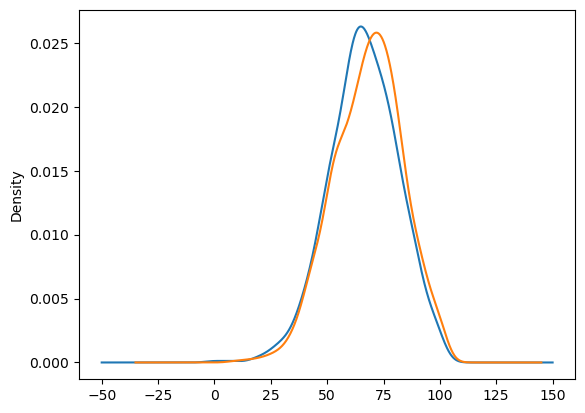

In [77]:
df[df['math score'] == 1000] = 100

df['math score'].plot.density()
df['writing score'].plot.density();

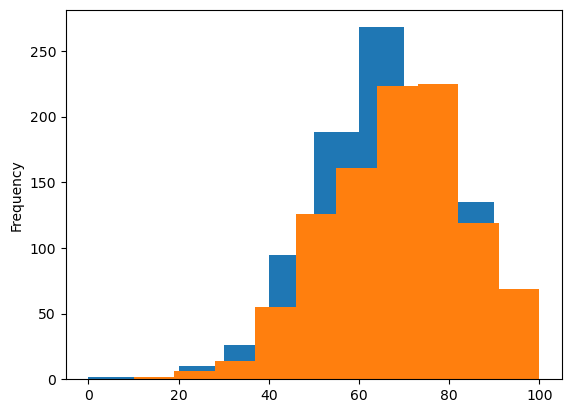

In [78]:
df['math score'].plot.hist()
df['writing score'].plot.hist();